# Dinamika konstrukcija: Instaliranje, pokretanje i osnovne operacije u programskome jeziku Python, slobodne neprigušene oscilacije materijalne čestice
Sveučilišni diplomski - Ljetni semestar akademske godine 2020/2021  
Predavač: Ivan Hlača  
email: ivan.hlaca@uniri.hr  
soba G-338

### Instaliranje i pokretanje  
U informatičkom praktikumu G-109 je instaliran Python i dovoljno je pronaći ikonu od Spyder-a na Desktopu ili Startu .

### Osnovne operacije i plotanje funkcija

Plotanje odnosno crtanje funkcija je moguće nakon uvođenja modula *matplotlib.pyplot* koji će se u nastavku skraćeno pozivati kao *plt*. Nacrtati će se kvadratna funkcija pomoću tri parametra: a, b i c.

In [1]:
import matplotlib.pyplot as plt

In [2]:
def kvadratna_funkcija(x):
    return a*x*x + b*x + c

In [3]:
a = 1.7
b = -7.5
c = 3.5
#tek nakon zadavanja parametara a, b i c se moze pozvati kvadratna_funkcija
kvadratna_funkcija(10) #vrijednost funkcije za x=10

98.5

Kvadratna funkcija $y=f(x)=a*x^2+b*x+c$ će se nacrtati za $i=100$ parova točaka $(x_i,y_i)$ unutar domene $x=[0,10⟩$.  
U kodu ispod se vrijednosti argumenta $x$ i funkcije $f(x)=y$ spremaju u liste $(x_i)$ i $(y_i)$ kao npr. u Excelu kada su vrijednosti jedne varijable ispisane u jednom stupcu.

In [4]:
x = [] #prazna lista
y = [] #prazna lista
for i in range(100):
    x.append(i*0.1) #dodavanje clanova listi pomocu naredbe append
    y.append(kvadratna_funkcija(i*0.1)) #dodavanje clanova listi pomocu naredbe append

In [5]:
y[:8] #ispis y-koordinata za prvih sedam tocaka (tzv. slicing)

[3.5,
 2.767,
 2.068,
 1.4029999999999996,
 0.7720000000000002,
 0.17499999999999982,
 -0.3880000000000008,
 -0.9170000000000007]

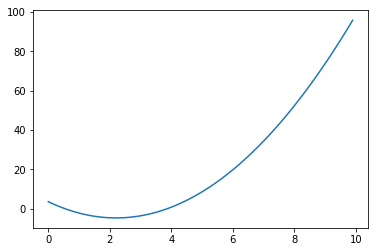

In [6]:
plt.plot(x,y) #naredba za plotanje krivulje

Nultočke funkcije $f(x)=0$ se mogu pronaći grafičkim očitanjem tako da se vizualno pronađu mjesta gdje krivulja sječe os apcise. Alternativno tome, nultočke **bilo koje** funkcije se mogu pronaći pomoću uvjetne naredbe if tako da se pronađe $x$ za koji je $y\approx 0$.

In [7]:
for i in range(len(y)):
    if abs(y[i])<0.25: #naredba abs daje apsolutnu vrijednost
        print(x[i])

0.5
3.9000000000000004


Nultočke kvadratne funkcije se mogu izravno tražiti prema sljedećoj formuli:  
$$x_{1,2}=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$ 
Rješenja jednadžbe su realni brojevi ako je zadovoljeno sljedeće $a\neq0$ i diskriminanta $d>0$. Ispod je napisana funkcija koja daje rješenje samo u slučaju kad su nultočke realni brojevi (u protivnom se dobije error).  

In [8]:
import math #uvodenje modula radi racunanja korijena diskriminante
def nultocke(a,b,c):
    d = b**2 - 4*a*c #diskriminanta
    nultocka_1 = (- b - math.sqrt(d))/(2*a)
    nultocka_2 = (- b + math.sqrt(d))/(2*a)
    return (nultocka_1,nultocka_2)

In [25]:
nultocke(a,b,c) #nultocke dobivene if petljom okvirno odgovaraju tocnim rjesenjima ispod

(0.5304440742792808, 3.881320631603072)

#### Debugiranje
Što se dogodi ako $a=0$ ili diskriminanta $d<0$?

In [9]:
#za parametre ispod a=0 pa se dobije ZeroDivisionError: float division by zero
#nultocke(0,2,1) 

In [10]:
#za parametre ispod d<0 pa se dobije ValueError: math domain error
#nultocke(5,2,1) 

Debugiranje se može napraviti s if naredbama koje upućuju na različiti oblik rješenja ovisno o uvjetima a==0 i d<0. Ispod je prikazan pristup pomoću funkcija za debugiranje *try* i *except*.

In [11]:
def nultocke(a,b,c):
    d = b**2 - 4*a*c #diskriminanta
    try:
        nultocka_1 = (-b - math.sqrt(d))/(2*a)
        nultocka_2 = (-b + math.sqrt(d))/(2*a)
    except ValueError:
        nultocka_1 = [-b/(2*a) ,-math.sqrt(-d)/(2*a)] #korijen od negativne diskriminante
        nultocka_2 = [-b/(2*a) ,+math.sqrt(-d)/(2*a)] #korijen od negativne diskriminante
    except ZeroDivisionError:
        nultocka_1 = -c/b
        nultocka_2 = "nema"
    return (nultocka_1,nultocka_2)

#### Editiranje grafova
Pozivanjem naredbi iz modula *plt* se mogu dodati nultočke na graf te ga urediti pojašnjenjima i estetskih doradama. Traženje nultočki kvadratne jednadžbe je korisno za dobivanje vlastitih frekvencija sustava s dva stupnja slobode.

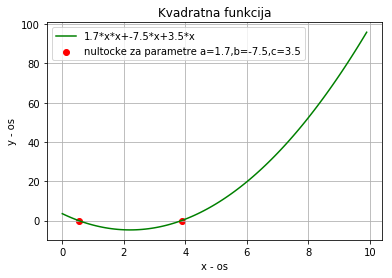

In [13]:
plt.plot(x,y,
         label=f"{a}*x*x+{b}*x+{c}*x", #tzv. f-string sintaksa za ispis parametara a,b,c
         color="green") 
plt.scatter(nultocke(a,b,c),[0,0], #naredba za plotanje tocki
            label=f"nultocke za parametre a={a},b={b},c={c}", #tzv. f-string sintaksa za ispis parametara a,b,c
            color="red") 
plt.title("Kvadratna funkcija")
plt.xlabel("x - os")
plt.ylabel("y - os")
plt.grid() #raster horizontalnih i vertikalnih linija
plt.legend()
plt.show()

#### Upload datoteka
Podaci za plotanje se mogu nalaziti i u nekoj tablici - npr. digitalni zapis x i y komponenti potresa preuzet s web-a. Ispod je kod za otvaranje datoteka, i to lokalno ili direktno s web-a (u početnom komentaru #).

https://github.com/Ivan768/Dinamika-konstrukcija/blob/main/elcentro.dat

In [26]:
#import urllib.request  
#file = urllib.request.urlopen("https://github.com/Ivan768/Dinamika-konstrukcija/blob/main/elcentro.dat")
x = []
y = []
file = "elcentro.dat" #lokalna datoteka u radnom dokumentu
with open(file) as f: #genericka naredba za otvaranje datoteka
    for line in f:
        row = line.split() #razdvajanje teksta temeljem razmaka ili taba
        x.append(float(row[0]))
        y.append(float(row[1]))

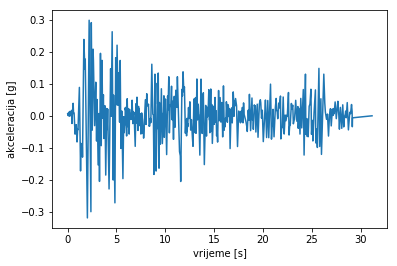

In [27]:
plt.plot(x,y)
plt.xlabel("vrijeme [s]")
plt.ylabel("akceleracija [g]")
plt.show()

### Slobodne neprigušene oscilacije materijalne čestice
Traži se rješenje diferencijalne jednadžbe koja opisuje gibanje materijalne čestice nakon pomicanja iz ravnotežnog položaja:  

$$m\ddot{x}+kx=0 \tag{1}$$  

Ovakvo gibanje se zove slobodno neprigušeno osciliranje te se sastoji od inercijalne sile $m\ddot{x}$ i elastične sile $kx$. Ranije (davno) je pronađeno rješenje koje zadovoljava gornju jednadžbu:  

$$x=A\cos{\omega t}+B\sin{\omega t} \tag{2}$$  

gdje je $\omega = \sqrt{\frac{k}{m}}$;  

Radi provjere ispravnosti rješenja $x$ se uvrsti u jednadžbu (1) koja se može zapisati kao $\ddot{x}+\omega^2 x=0$. Prvo se izračuna druga derivacija od $x$ pa se onda može napraviti provjera:  
  
$$\dot{x}=-A\omega\sin{\omega t}+B\omega\cos{\omega t} \tag{3}$$  
  
$$\ddot{x}=-A\omega^2\cos{\omega t}-B\omega^2\sin{\omega t}=-\omega^2 (A\cos{\omega t}+B\sin{\omega t}) \tag{4}$$
  
$$\\-\omega^2 x + \omega^2 x = 0 \tag{5}$$
  
Obzirom da je jednakost u jednadžbi (5) zadovoljena, pokazano je da rješenje (2) zadovoljava jednadžbu (1). Parametri gibanja $A$ i $B$ se mogu dobiti pomoću rubnih uvjeta:  
$x=x_0$ prema jednadžbi (2) iz čega se dobije $A=x_0$  
$\dot{x_0}=\dot{x_0}$ prema jednadžbi (3) iz čega se dobije $B=\frac{v_0}{\omega}$  
gdje su početni početni položaj $x_0$, početna brzina $v_0$ i kružna frekvencija $\omega$ poznate veličine.  
Rješenje diferencijalne jednadžbe se sada može zapisati na sljedeći način:

$$x=x_0 \cos{\omega t}+\frac{v_0}{\omega} \sin{\omega t} \tag{6}$$

In [16]:
#jednadzba polozaja (6) se zapise kao funkcija
def slobodne_neprigusene(t,x_0,v_0): #jednadzba polozaja ovisna o vremenu t i pocetnim uvjetima
    return x_0*math.cos(omega*t)+(v_0/omega)*math.sin(omega*t)

<img src="https://raw.githubusercontent.com/Ivan768/Dinamika-konstrukcija/main/slobodne_neprigusene.PNG">
izvor:   

https://github.com/Ivan768/Dinamika-konstrukcija/blob/main/slobodne_neprigusene.PNG

Potrebno je prikazati gibanje materijalne čestice za primjer na slici. Parametri i početni uvjeti su zadani ispod.

In [71]:
#definicija parametara u SI mjernim jedinicama
k = 7000 #krutost opruge u [N/m] (ovdje može biti aksijalna ili savojna krutost stapa)
m = 2500 #masa materijalne cestice u [kg] (ovdje može biti masa objesena na kraj stapa)
omega = math.sqrt(k/m) #kruzna frekvencija
x_0 = 0.00 #pocetni polozaj u [m]
v_0 = -0.08 #pocetna brzina u [m/s]

Definirana je funkcija koja opisuje gibanje materijalne čestice ovisno o vremenu i definirani su parametri $k$ i $m$ iz čega slijedi $\omega$. Početni uvjeti položaja i brzine su dani kao $x_0$ i $v_0$. Sada se položaj materijalne čestice ovisno o vremenu može pokazati na grafu (plotu) jednakim postupkom kao ranije. Razmatrati će se prvih 10 sekundi u vremenskim koracima od 0.1 s odnosno $x=[0.0 ,10.0 ⟩s$

In [18]:
vrijeme = [] 
polozaj = [] 
for i in range(100):
    vrijeme.append(i*0.1) 
    polozaj.append(slobodne_neprigusene(i*0.1,x_0,v_0)) 

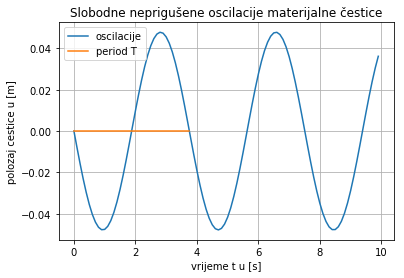

In [19]:
plt.plot(vrijeme,polozaj, label="oscilacije")
T = 2*math.pi/omega
plt.plot([0,T],[0,0], label="period T")
plt.title("Slobodne neprigušene oscilacije materijalne čestice")
plt.xlabel("vrijeme t u [s]")
plt.ylabel("polozaj cestice u [m]")
plt.grid()
plt.legend()
plt.show()

#### Modul Numpy
Numpy je modul u Pythonu koji služi za matrične operacije, a i razne druge stvari kod računanja. Umjesto kreiranja parova točaka $(x_i,y_i)$ koji se spremaju u liste $(x_i)$ i $(y_i)$ uz Numpy se taj korak može preskočiti. Da bi se to napravilo, prvo se funkcija "slobodne_neprigusene" treba prepraviti da umjesto math.cos() naredba piše np.cos() naredba, te isto tako za sinus.

In [46]:
import numpy as np

In [47]:
def slobodne_neprigusene(t,x_0,v_0): #jednadzba polozaja ovisna o vremenu t i pocetnim uvjetima
    return x_0*np.cos(omega*t)+(v_0/omega)*np.sin(omega*t)

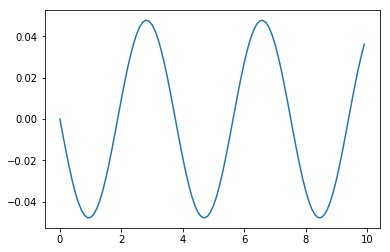

In [74]:
t = np.arange(0.0,10.0,0.1)
plt.plot(t,slobodne_neprigusene(t,x_0,v_0))
plt.show()

Osim položaja točke, može se nacrtati graf brzine i ubrzanja materijalne čestice. To se može napraviti numeričkom derivacijom ili direktno prema izvedenim izrazima za brzinu (3) i ubrzanje (4) koji se upišu u zasebne funkcije.

In [44]:
#jednadzba brzine (3) se zapise kao funkcija
def slobodne_neprigusene_brzina(t,x_0,v_0): #jednadzba brzine ovisna o vremenu t i pocetnim uvjetima
    return -x_0*omega*np.sin(omega*t)+(v_0)*np.cos(omega*t)

In [45]:
#jednadzba ubrzanja(4) se zapise kao funkcija
def slobodne_neprigusene_ubrzanje(t,x_0,v_0): #jednadzba ubrzanja ovisna o vremenu t i pocetnim uvjetima
    return -omega*omega*slobodne_neprigusene(t,x_0,v_0)

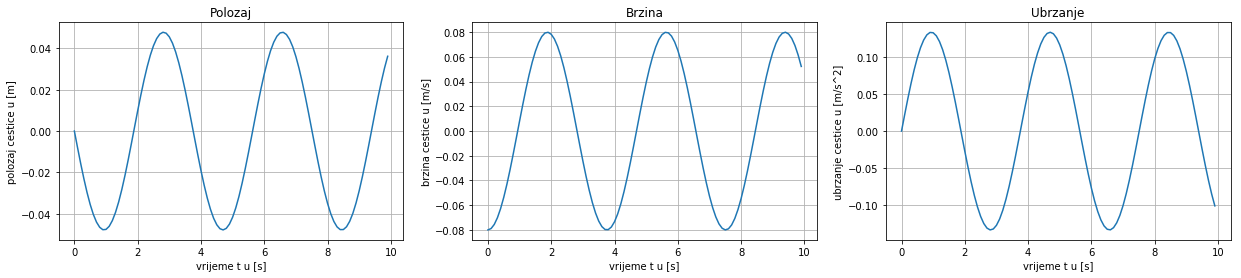

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(21, 4)) #sintaksa za vise grafova
ax[0].plot(t,slobodne_neprigusene(t,x_0,v_0))
ax[1].plot(t,slobodne_neprigusene_brzina(t,x_0,v_0))
ax[2].plot(t,slobodne_neprigusene_ubrzanje(t,x_0,v_0))
ax[0].set_title("Polozaj")
ax[1].set_title("Brzina")
ax[2].set_title("Ubrzanje")
ax[0].set_ylabel("polozaj cestice u [m]")
ax[1].set_ylabel("brzina cestice u [m/s]")
ax[2].set_ylabel("ubrzanje cestice u [m/s^2]")
for i in range(3):
    ax[i].set_xlabel("vrijeme t u [s]")
    ax[i].grid()
plt.show()

### Kod  za demonstraciju utjecaja početnih uvjeta i za demonstraciju gibanja 
Analizirati će se utjecaj početnih uvjeta. Ispod je dan kod koji se može kopirati u Spyder te pokrenuti i interaktivno mjenjati parametre.  
NAPOMENA: Služi za demonstraciju i nije potrebno za seminarski rad!

#### Analiza utjecaja početnih uvjeta na oscilacije materijalne čestice
U sljedećem inputu je dan kod za Spyder.

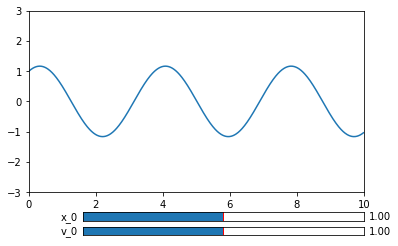

In [84]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
t = np.arange(0.0, 10.0, 0.01)
x_0 = 1
v_0 = 1
l, = plt.plot(t, slobodne_neprigusene(t,x_0,v_0))
plt.axis([0, 10, -3, 3])

ax_x_0 = plt.axes([0.25, 0.15, 0.65, 0.03])
ax_v_0 = plt.axes([0.25, 0.1, 0.65, 0.03])

slider_x_0 = Slider(ax_x_0, 'x_0', -1.0, 3.0, valinit=x_0)
slider_v_0 = Slider(ax_v_0, 'v_0', -1.0, 3.0, valinit=v_0)

def update(val):
    x_0 = slider_x_0.val
    v_0 = slider_v_0.val
    l.set_ydata(slobodne_neprigusene(t,x_0,v_0))
    fig.canvas.draw_idle()
slider_x_0.on_changed(update)
slider_v_0.on_changed(update)

plt.show()

U sljedećem inputu je dan nešto jednostavniji kod za Jupyter notebook.

#### Gibanje materijalne točke
U sljedećem inputu je dan kod samo za Jupyter notebook. Primjer za Spyder će biti na sljedećim vježbama.

In [97]:
from ipywidgets import interact

x_0 = 0.00
v_0 = -0.08
L = 0.1 #pocetna duljina opruge/stapa
def gibanje(t):
    fig, ax = plt.subplots(1, 2, figsize=(16, 3))
    ax[0].plot(vrijeme,polozaj,color='green')
    ax[0].axvline(t,color='black')
    ax[0].grid()
    L_stvarni = L+slobodne_neprigusene(t,x_0,v_0)
    ax[1].scatter(L_stvarni,0,s=200,label="materijalna cestica") #s je velicina tocke
    ax[1].plot([i/100*L_stvarni for i in range(1,100)],
                [math.sin(i)/1000 for i in range(1,100)])
    ax[1].axvline(L,color='black',label="pocetni polozaj")
    ax[1].set_xlim(0.0,0.15)
    ax[1].legend()
    plt.show()

interact(gibanje, t = (0,10))

interactive(children=(IntSlider(value=5, description='t', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.gibanje(t)>